In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

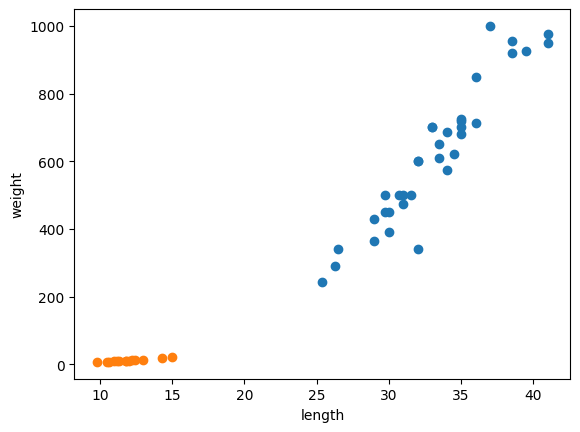

In [3]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
len(smelt_length)

14

In [5]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

fish_target = [1] * 35 + [0] * 14

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [7]:
# 의미 없는 점수 (모의고사 == 수능)
kn.score(fish_data, fish_target)

1.0

In [8]:
kn.predict([[30, 600]])

array([1])

In [9]:
# N 개수가 너무 많으면,
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [10]:
train_input = fish_data[:35]
train_target = fish_target[:35]

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [11]:
test_input = fish_data[35:]
test_target = fish_target[35:]
kn.score(test_input, test_target)

0.0

In [12]:
# Numpy
import numpy as np

fish_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

# 현재 index array 에는 랜덤하게 섞인 idx 값이 저장
train_input = fish_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = fish_arr[index[35:]]
test_target = target_arr[index[35:]] 

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [13]:
train_input[1:3]

array([[12.4, 13.4],
       [14.3, 19.7]])

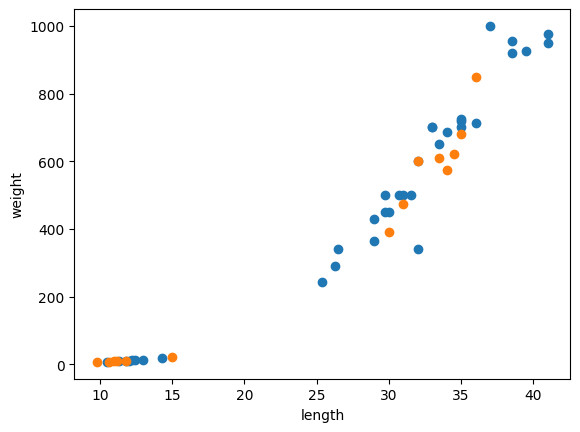

In [14]:
# train_input[:, 0] => 전체 데이터 줄, 첫번째(idx 0) 컬럼 
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [16]:
kn.score(test_input, test_target)

1.0

# 데이터 전처리 + 테스트/트레인 구분 + 학습

In [17]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [18]:
import numpy as np

In [19]:
fish_data = np.column_stack([fish_length, fish_weight])

In [20]:
fish_target = np.concatenate([np.ones(35), np.zeros(14)])

In [21]:
from sklearn.model_selection import train_test_split

# 75% train / 25% test
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
# 훈련
kn.fit(train_input, train_target)
# 테스트
kn.score(test_input, test_target)

1.0

In [23]:
new_fish = [25, 150]
kn.predict([new_fish])

distances, indexes = kn.kneighbors([new_fish])

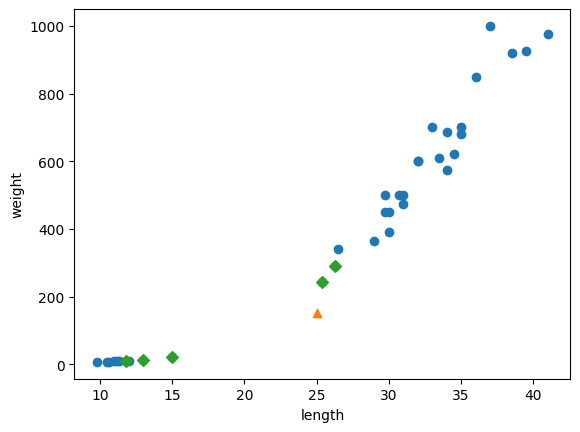

In [24]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std

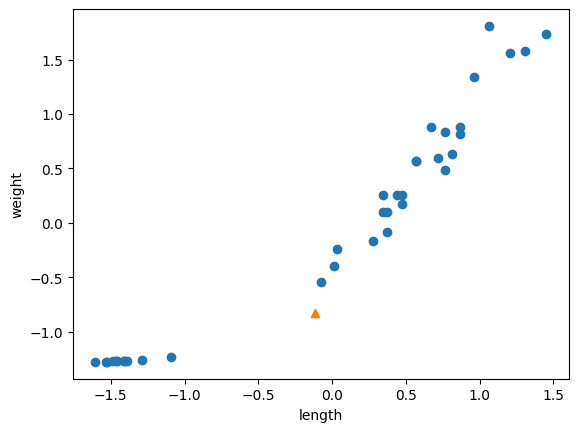

In [66]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

new_fish = ([25, 150] - mean) / std
plt.scatter(new_fish[0], new_fish[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [70]:
kn.fit(train_scaled, train_target)
kn.predict([new_fish])

array([1.])

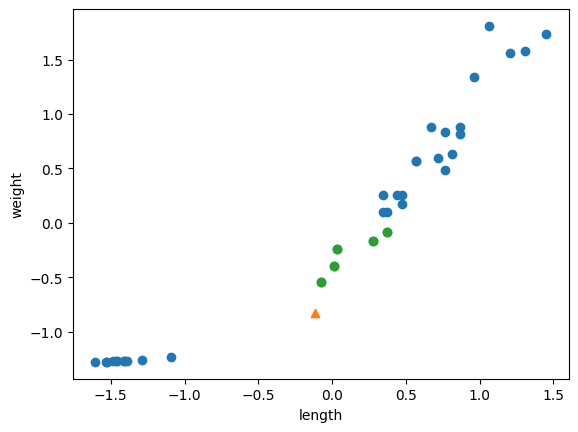

In [69]:
distances, indexes = kn.kneighbors([new_fish])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_fish[0], new_fish[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()